In [2]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [4]:
print(cancer.data.shape,cancer.target.shape)

(569, 30) (569,)


In [5]:
cancer.data[:3,]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [7]:
x=cancer.data
y=cancer.target

In [13]:
import matplotlib.pyplot as plt
import numpy as np

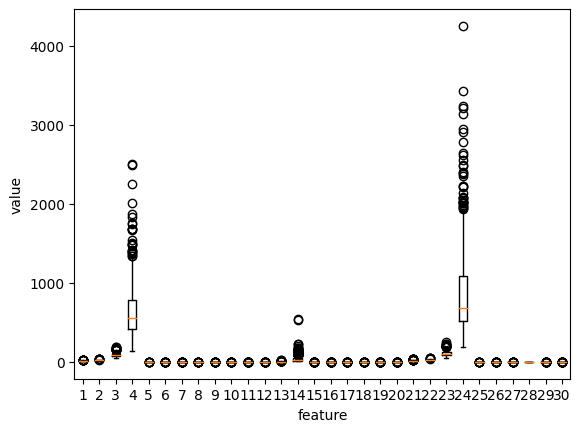

In [12]:
plt.boxplot(x)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [27]:
np.unique(y,return_counts= True)
212/357

0.5938375350140056

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.2)

In [23]:
print(x_train.shape,x_test.shape)

(455, 30) (114, 30)


In [26]:
np.unique(y_test,return_counts=True)
42/72

0.5833333333333334

In [31]:
class LogisticNeuron:
  def __init__(self):
    self.w=None
    self.b=None

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1.0*err
    return w_grad, b_grad

  def activation(self,z):
    a=1/(1+np.exp(-z))
    return a

  def fit(self,x,y,epochs=100):
    self.w=np.ones(x.shape[1])
    self.b=0
    for i in range(epochs):
      for x_i,y_i in zip(x,y):
        z=self.forpass(x_i)
        a=self.activation(z)
        err=y_i-a
        w_grad, b_grad=self.backprop(x_i,err)
        self.w+=w_grad
        self.b+=b_grad

  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    a=self.activation(np.array(z))
    return a>0.5

In [32]:
neuron = LogisticNeuron()
neuron.fit(x_train,y_train)

<ipython-input-31-16370d2af0be>:16: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))


In [34]:
np.mean(neuron.predict(x_test)==y_test)

<ipython-input-31-16370d2af0be>:16: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))


0.8245614035087719